In [18]:
import numpy as np
np.set_printoptions(linewidth=750)

import pandas as pd
import matplotlib.pyplot as plt

from numba import jit

from sympy import factorint, Mul, primefactors, sqrt, totient, prime

import primefac
import sys

ModuleNotFoundError: No module named 'primefac'

In [2]:
def bezout(a,b):
    u={}
    v={}
    r = {}
    q = {}

    if b>0:
        (r[0],r[1]) = (b, a%b)
        q[0] = a // b
        u[0] = 0; v[0] = 1
        u[1] = 1; v[1] = - q[0]

    i = 1
    while r[i]>0:
        r[i+1] = r[i-1]%r[i]
        q[i] = r[i-1]//r[i]
        u[i+1] = u[i-1] - q[i]*u[i]
        v[i+1] = v[i-1] - q[i]*v[i]
        i+=1

    i = list(u.keys())[-2]
    return (u[i], v[i], r[i])


def bezout_det(a,b):
    (u,v,r) = bezout(a,b)
    (c,d) = (-v, u)
    
    (u,v,r) = bezout(a,b)
    (c,d) = (-v, u)

    if c<0 and 0<=d:
        k = -c//a
        if c+k*a<0:
            k+=1
    elif d<0 and 0<=c:
        k = -d//b
        if b+k*d<0:
            k+=1
    elif c<0 and d<0:
        k = max((-c//a), (-d//b))
        if c+k*a<0 or b+k*d<0:
            k+=1
    else:
        k=0
    
    c = c + k*a
    d = d + k*b
    
         
    return [[c,d],[a-c, b-d]]

In [11]:
for n in range(2, 100):
    wpos = [[1,1]]
    lpos =[]
    for k in range(3,n+1):
        for a in range(1,k):
            b = k-a

            (u,v,r) = bezout(a,b)
            if r==1 or r==-1:    
                [[c0,d0],[c1,d1]] = bezout_det(a, b)

                if (a==c0) or (b==d0):
                    wpos.append([a,b])

                if (a==c1) or (b==d1):
                    wpos.append([a,b])

                if [a-c0,b-d0] in wpos and [a-c1,b-d1] in wpos:
                    lpos.append([a,b])

                if [a-c0,b-d0] in lpos or [a-c1,b-d1] in lpos:
                    wpos.append([a,b])


    l_test=[]
    for a in range(1,n+1):
        for b in range(1,n+1):
            if a+b<=n and b<=a and b%2==1:
                (u,v,r) = bezout(a,b)
                if r==1 or r==-1:
                    l_test.append([a,b])
                    l_test.append([b,a])
                
        

    row_mult = {}
    row_prime = {}
    for j in range(1,n//2 + 1,2):
        row_mult[j] = np.zeros(n-2*j+1, dtype="int")
        prime_list = primefactors(j)
        for p in prime_list:
            row_mult[j][[k*p for k in range(1+(n-2*j)//p)]]+=1
        row_prime[j]=1-np.sign(row_mult[j])

        
    res=0
    for j in range(1, n//2 + 1,2):
        q=(n-2*j+1)//j
        r=(n-2*j+1)%j
        res+=q*totient(j) + phi(j, r-1)
    yares = 2*res-1
    
    
    print(n, len(l_test)-1, len(wpos), 2*sum([sum(row_prime[j]) for j in row_prime.keys()])-1, yares)

NameError: name 'phi' is not defined

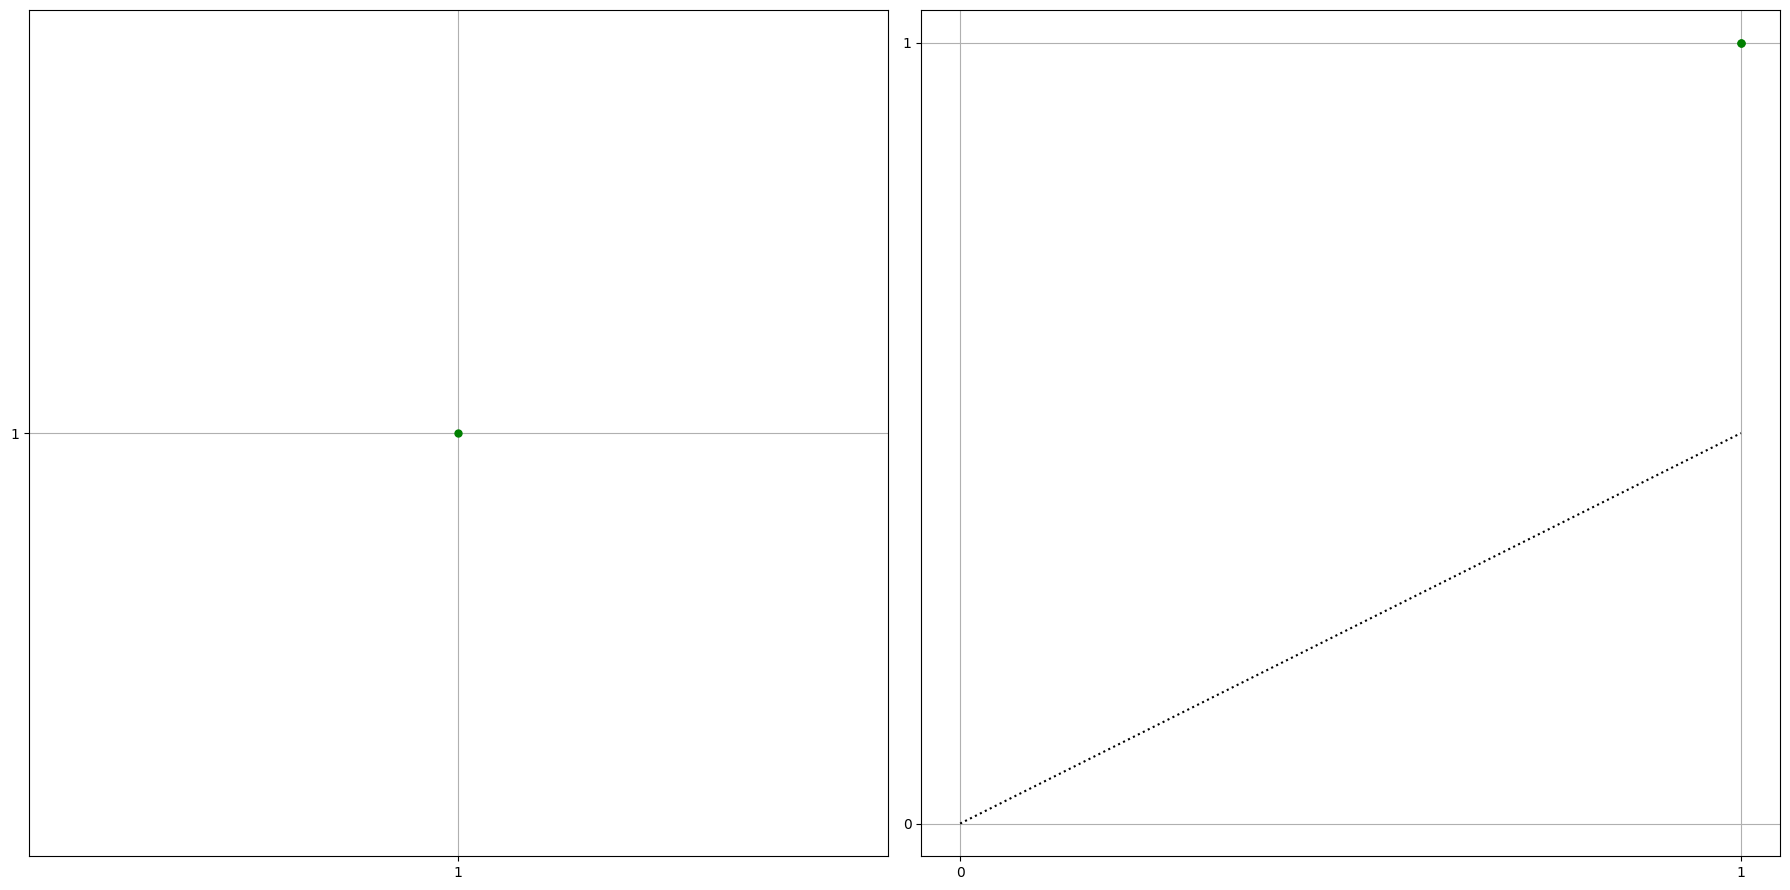

In [12]:
plt.figure(figsize=(18,9))

plt.subplot(1,2,1)
for wp in wpos:
    plt.plot(wp[0], wp[1], "o", color="green",markersize=5)
plt.xticks(ticks=range(0,n+1))
plt.yticks(ticks=range(0,n+1))

for k in range(2, n+1):
    plt.plot([1,k-1],[k-1,1], linestyle='dotted', color="black")
plt.plot([1,n-1],[1,n-1], linestyle='dotted', color="black")
plt.grid()
plt.axis('equal')
           
plt.subplot(1,2,2) 
for p in l_test:
    plt.plot(p[0], p[1], "o", color="green",markersize=5)
plt.xticks(ticks=range(0,n+1))
plt.yticks(ticks=range(0,n+1))

for k in range(2, n+1):
    plt.plot([1,k-1],[k-1,1], linestyle='dotted', color="black")
    
plt.plot([1,n-1],[1,n-1], linestyle='dotted', color="black")
plt.plot([0,n-1],[0,(n-1)/2], linestyle='dotted', color="black")

plt.grid()
plt.axis('equal')

plt.tight_layout()

In [13]:
n=49
j=3
totient(j)
(n-2*j+1)//j

phi(j, (n-2*j+1)%j-1)
(n-2*j+1), j, (n-2*j+1)//j, (n-2*j+1)%j-1

NameError: name 'phi' is not defined

In [14]:
n=100
res=0
for j in range(1, n//2 + 1,2):
    q=(n-2*j+1)//j
    r=(n-2*j+1)%j
    #print(j, q*totient(j), phi(j, r-1), q*totient(j) + phi(j, r-1))
    res+=q*totient(j) + phi(j, r-1)
print(2*res-1)

NameError: name 'phi' is not defined

In [15]:
def gcd(a, b):
    if (a == 0):
        return b
    return gcd(b % a, a)
 
# A simple method to evaluate
# Euler Totient Function
def phi(n, pmax=n):
    result = 0
    for i in range(1, min(n, pmax+1)):
        if (gcd(i, n) == 1):
            result+=1
    return result

In [16]:
phi(9,3)

2

In [17]:


n=12345
factors = list( primefac.primefac(n) )
factors

ModuleNotFoundError: No module named 'primefac'

In [714]:
%%time

n=100
pf={}
for j in range(2,n//2 + 1,2):
    pf[j] = primefactors(j)

def euler_787(n):
    res=int(0)
    for j in range(1, n//2 + 1,2):
        row_mult = np.zeros(n-2*j+1, dtype="int")
        prime_list = primefac.primefac(j)
        
        for p in prime_list:
            row_mult[[k*p for k in range(1+(n-2*j)//p)]]+=1
        row_prime=1-np.sign(row_mult)
        res+=np.sum(row_prime)

    res=2*res-1
    return res

euler_787(n)

CPU times: user 1.3 ms, sys: 1e+03 ns, total: 1.31 ms
Wall time: 1.32 ms


2043

In [691]:
%%time
n=10000
pf={}
for j in range(1,n//2 + 1,2):
    pf[j] = primefac.primefac(j)

CPU times: user 127 ms, sys: 37.3 ms, total: 164 ms
Wall time: 165 ms


In [574]:
%%time

n = 100

row={}
runtime={}
for j in range(1, n//2 + 1, 2):
    res = (n-2*j + 1)
    for p in primefactors(j):
        res-=(n-2*j)//p + 1
    row[j] = res
    runtime[j] = datetime.now()
    
2*sum([v for v in row.values()]) - 1

CPU times: user 557 µs, sys: 1 µs, total: 558 µs
Wall time: 569 µs


2017

In [568]:
import pandas as pd
z_df = pd.DataFrame({"n":list(runtime.keys()), "time":np.array(list(runtime.values()))-runtime[1]})

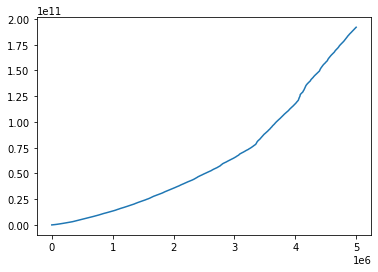

In [570]:
plt.plot(z_df["n"], z_df["time"])

## Timeit

In [8]:
%timeit primefactors(1000)

3.99 µs ± 100 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [475]:
%%time
n=1000000
for i in range(1, n):
    primefactors(i)

CPU times: user 21.5 s, sys: 137 ms, total: 21.6 s
Wall time: 22.3 s


In [433]:
%timeit primefactors(np.random.randint(1,1000000000))

2.38 µs ± 28 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [440]:
%timeit totient(1000000000)

369 ns ± 5.86 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [449]:
prime(1000000000)

22801763489

In [452]:
%timeit totient(22801763489)

404 ns ± 6.66 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [719]:
%timeit totient(1000000000-1)

385 ns ± 4.83 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [802]:
def gcd(a, b):
    if (a == 0):
        return b
    return gcd(b % a, a)
 
def phi(n, pmax=n):
    result = 0
    for i in range(1, min(n, pmax+1)):
        if (gcd(i, n) == 1):
            result+=1
    return result

In [829]:
%%time
n=1000
res=0
for j in range(1, n//2 + 1,2):
    q=(n-2*j+1)//j
    r=(n-2*j+1)%j
    res+=q*totient(j) + phi(j, r-1)
yares = 2*res-1
yares

CPU times: user 62.3 ms, sys: 3.63 ms, total: 65.9 ms
Wall time: 63.9 ms


202869

In [801]:
%%time
for i in range(1000000):
    a = np.random.randint(1000000)
    b = np.random.randint(1000000)
    #gcd(a,b)
    bezout(a,b)

CPU times: user 14.7 s, sys: 34.4 ms, total: 14.7 s
Wall time: 14.7 s


In [ ]:
𝑚−⌊𝑚𝑝1⌋−⌊𝑚𝑝2⌋+⌊𝑚𝑝1𝑝2⌋

In [819]:
n = 15
p1 = 3
p2 = 5
for m in range(1, 20):
    print(phi(n, m), m - m//p1-m//p2 + m//(p1*p2))

1 1
2 2
2 2
3 3
3 3
3 3
4 4
5 5
5 5
5 5
6 6
6 6
7 7
8 8
8 8
8 9
8 10
8 10
8 11


In [821]:
%timeit primefactors(1000000000-1)

43.2 µs ± 2.52 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [823]:
20000/3600

5.555555555555555

In [841]:
%%time
n=20000
row_mult = {}
row_prime = {}
for j in range(1, n//2 + 1,2):
    row_mult[j] = np.zeros(n-2*j+1, dtype="int")
    prime_list = primefactors(j)
    for p in prime_list:
        row_mult[j][[k*p for k in range(1+(n-2*j)//p)]]+=1
    row_prime[j]=1-np.sign(row_mult[j])

CPU times: user 1.97 s, sys: 294 ms, total: 2.26 s
Wall time: 2.26 s


In [837]:
row_mult

{1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 3: array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1

In [21]:
totient(87109)

79180